In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [4]:
url = '/Users/npurwar/Downloads/student+performance/student/student-por.csv'
column_names = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu',
                'Mjob','Fjob','reason','guardian','traveltime','studytime','failures',
                'schoolsup','famsup','paid','activities','nursery','higher','internet',
                'romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=';', skipinitialspace=True, skiprows=1)

raw_dataset["sex"] = np.where(raw_dataset["sex"] == "F", 0, 1)
raw_dataset["school"] = np.where(raw_dataset["school"] == "GP", 0, 1)
raw_dataset["address"] = np.where(raw_dataset["address"] == "R", 0, 1)
raw_dataset["famsize"] = np.where(raw_dataset["famsize"] == "GT3", 0, 1)
raw_dataset["Pstatus"] = np.where(raw_dataset["Pstatus"] == "A", 0, 1)
raw_dataset["schoolsup"] = np.where(raw_dataset["schoolsup"] == "yes", 0, 1)
raw_dataset["famsup"] = np.where(raw_dataset["famsup"] == "yes", 0, 1)

raw_dataset["paid"] = np.where(raw_dataset["paid"] == "yes", 0, 1)
raw_dataset["activities"] = np.where(raw_dataset["activities"] == "yes", 0, 1)
raw_dataset["nursery"] = np.where(raw_dataset["nursery"] == "yes", 0, 1)
raw_dataset["higher"] = np.where(raw_dataset["higher"] == "yes", 0, 1)
raw_dataset["internet"] = np.where(raw_dataset["internet"] == "yes", 0, 1)
raw_dataset["romantic"] = np.where(raw_dataset["romantic"] == "yes", 0, 1)

job_mapping = {'at_home': 1, 'health': 2, 'other': 3, 'services': 4,'teacher': 5}
raw_dataset["Mjob"] = raw_dataset["Mjob"].map(job_mapping)
raw_dataset["Fjob"] = raw_dataset["Fjob"].map(job_mapping)

reason_mapping = {'course': 1, 'home': 2, 'other': 3, 'reputation': 4}
raw_dataset["reason"] = raw_dataset["reason"].map(reason_mapping)

guardian_mapping = {'mother': 1, 'father': 2, 'other': 3}
raw_dataset["guardian"] = raw_dataset["guardian"].map(guardian_mapping)

raw_dataset.tail()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,1,0,19,0,0,1,2,3,4,3,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,5,4,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,3,3,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,4,4,...,2,4,5,3,4,2,6,10,10,10
648,1,1,18,0,1,1,3,2,4,3,...,4,4,1,3,4,5,4,10,11,11


In [5]:
train_dataset = raw_dataset.sample(frac=0.8, random_state=0)
test_dataset = raw_dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('G1')

test_labels = test_features.pop('G1')

In [6]:
train_dataset.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
121,0,1,15,1,0,1,2,2,4,4,...,5,5,4,1,2,5,6,14,13,13
507,1,0,17,1,1,1,1,1,3,4,...,4,3,3,1,1,3,0,11,11,10
228,0,0,17,0,1,1,4,4,4,3,...,5,2,1,1,2,3,6,12,11,11
445,1,1,15,0,0,1,1,1,3,3,...,5,4,5,2,4,4,8,7,9,9
117,0,1,16,1,0,1,3,3,3,4,...,5,4,2,1,1,5,6,14,14,15


In [7]:
test_dataset.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
619,1,0,18,1,0,1,3,3,4,4,...,4,3,2,1,3,3,6,13,12,13
627,1,1,18,0,1,1,1,2,1,4,...,4,3,3,2,3,3,3,9,10,10
629,1,0,17,0,0,1,1,2,3,3,...,3,5,5,1,3,1,4,7,8,9
633,1,0,18,0,1,1,4,4,5,4,...,5,4,3,3,4,2,1,13,14,14
639,1,1,19,0,0,1,1,1,3,4,...,4,3,2,1,3,5,0,5,8,0


In [8]:
train_labels.tail()

121    14
507    11
228    12
445     7
117    14
Name: G1, dtype: int64

In [9]:
test_labels.tail()

619    13
627     9
629     7
633    13
639     5
Name: G1, dtype: int64

In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
school,0.362235,0.481110
sex,0.377649,0.485267
age,16.789981,1.236594
address,0.705202,0.456392
famsize,0.290944,0.454636
Pstatus,0.868979,0.337749
Medu,2.527938,1.124786
Fedu,2.290944,1.091444
Mjob,2.911368,1.251966
Fjob,3.217726,0.854691


In [11]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [12]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
    

In [13]:
train_features_tf = tf.convert_to_tensor(train_features, dtype=tf.float32)
normalizer.adapt(train_features_tf)

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 32)                65        
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4290 (16.76 KB)
Trainable params: 4225 (16.50 KB)
Non-trainable params: 65 (264.00 Byte)
_________________________________________________________________


In [14]:
%time

history = dnn_model.fit(
    train_features_tf,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 12.2 µs


In [15]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [G1]')
  plt.legend()
  plt.grid(True)

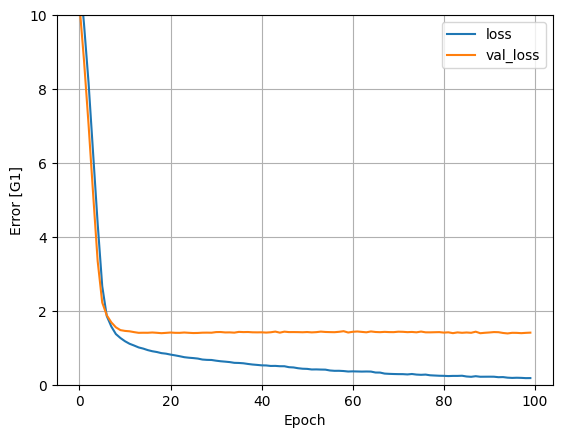

In [16]:
plot_loss(history)

In [17]:
test_features_tf = tf.convert_to_tensor(test_features, dtype=tf.float32)

test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features_tf, test_labels, verbose=0)

In [18]:
pd.DataFrame(test_results, index=['Mean absolute error [G1]']).T

,Mean absolute error [G1]
dnn_model,1.418965


5/5 [==============================] - 0s 699us/step


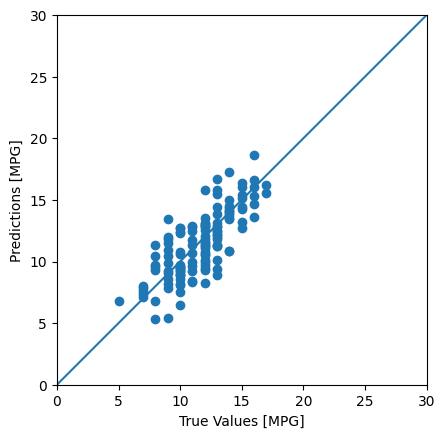

In [19]:
test_predictions = dnn_model.predict(test_features_tf).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

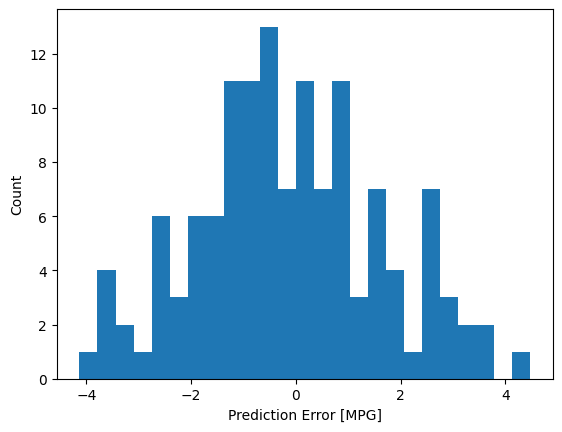

In [20]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [21]:
dnn_model.save('dnn_model.keras')